LinearRegression 클래스 활용.
fit_intercept(절편값의 계산 여부 지정) 하이퍼 파라미터를 입력 받음.
결과값으로, coef_(학습된 모델 특성의 가중치 추정값)과 intercept_(학습된 모델의 절편 추정값을) 가짐.

(1) 데이터 구성하기

In [ ]:
데이터는 y = 4x + 7 이고, x에 입력할 데이터는 1~10으로 한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2023)

#x는 1~10, y는 4x+7인 학습 데이터 생성하기
x = []
y = []
for i in range(1,11) :
    x.append(i)
    y.append(4*i+7)

#데이터 확인하기
print('x : ', x)
print('y : ', y)

x :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y :  [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


(2) 선형 회귀 학습하기

In [2]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

#학습을 위해 1행 10열 구성 데이터를 10행 1열로 변경하기
x = np.array(x).reshape(-1,1)

#데이터 확인하기
print("학습 데이터 확인")
print('x :', x)
print('x.shape :', x.shape)

학습 데이터 확인
x : [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
x.shape : (10, 1)


In [3]:
#학습하기
reg.fit(x,y)

LinearRegression()

In [4]:
#산식 추정을 위한 기울기(coef) 및 절편(intercept) 확인하기
print(f'''기울기 및 절편 확인 coef = {reg.coef_}, intercept = {reg.intercept_} ''')

기울기 및 절편 확인 coef = [4.], intercept = 6.9999999999999964 


In [7]:
coef_intercept = x * reg.coef_[0] + reg.intercept_
print(coef_intercept)

[[11.]
 [15.]
 [19.]
 [23.]
 [27.]
 [31.]
 [35.]
 [39.]
 [43.]
 [47.]]


(3) 결과 비교를 위한 그래프 그리기

C:\Users\dothe\AppData\Local\Temp\ipykernel_34020\3763357586.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(7, 20, 'coef_ = %.0f'%reg.coef_, size=12)


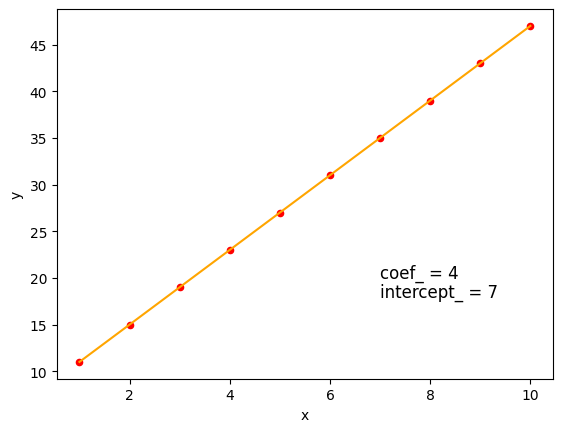

In [12]:
#scatter plot 그래프 그리기
plt.scatter(x,y,color='r', s=20)

#선 그래프 그리기
plt.plot(x, coef_intercept, color='orange')

#coef 값 그래프 내에 텍스트 삽입하기
plt.text(7, 20, 'coef_ = %.0f'%reg.coef_, size=12)

#intercept 값 그래프 내에 텍스트 삽입하기
plt.text(7, 18, 'intercept_ = %.0f'%reg.intercept_, size=12)

#x축(가로) label 설정하기
plt.xlabel('x')

#y축(세로) label 설정하기
plt.ylabel('y')
plt.show()

머신러닝은 어떤 방법으로 4와 7의 값이 정답인지 확인할 수 있을까?
가장 확실한 방법은 모든 숫자를 대입해보는 것이다.
위의 예시에서는 사용한 변수가 1개이므로 대입을 많이 할 필요가 없지만
여러개의 Feature가 존재한다면 연산이 기하급수적으로 늘어난다.
이럴 때 빠르게 최적의 값을 찾아가는 개념이 Gradient Descent 알고리즘이다.

3) 사례 기반 선형 회귀 모델링

데이터 출처

https://www.data.go.kr/data/15007122/fileData.do
# 2025.10.16 기준으로 전산망 에러

건강 검진 데이터를 바탕으로 LDL 콜레스테롤 수치를 예측해보는 선형 회귀 모델.
우선 간단한 가설로 치아 관련 문항은 콜레스테롤과 상관 없을 것이라는 가설을 세워서 실습을 진행하고 가중치 확인하기.
모델링에 앞서 모델링을 위한 데이터 전처리하기.

(1) 데이터 전처리하기

In [ ]:
import pandas as pd

df = pd.read_csv("국민건강보험공단_건강검진정보_20211229.csv", encoding='cp949')

#pandas display 옵션 조정을 통해 view 범위 확장하기
pd.set_option('display.max_columns', None) #display 옵션을 통한 전체 열 확장

#데이터 확인하기
df.head(5)

In [14]:
#가설을 참고하여 일부 데이터 삭제하기
#시력, 청력, 치아 관련 칼럼은 관계없다는 가정으로 열 제거하기
df.drop(["치아우식증유무", "치석", "시력(좌)", "시력(우)", "청력(좌)", "청력(우)", "구강검진 수검여부"],
        axis=1, inplace=True)

#기준년도 칼럼 확인하기(모두 2020 동일 값이므로, 기준년도 컬럼 삭제)
print("기준년도 칼럼 확인")
df.기준년도.value_counts()

NameError: name 'df' is not defined

In [ ]:
#가입자 일련번호 컬럼 확인하기(모두 unique한 값으로 확인되어 가입자 일련번호 컬럼 삭제)
print("가입자 일련번호 칼럼 확인")
df["가입자 일련번호"].value_counts()

In [ ]:
#성별코드 칼럼 확인하기
print("성별코드 칼럼 확인")
df.성별코드.value_counts()

In [ ]:
#불필요한 데이터 삭제하기
df.drop(['기준년도', '가입자 일련번호', '데이터 공개일자', '성별코드', '시도코드'], axis=1, inplace=True)

#별도의 test 데이터 추출하기
test = df[df['LDL 콜레스테롤'].isnull()]

#NaN 데이터 행 단위로 삭제하기
train = df.dropna(axis=0)

#학습 데이터 확인하기
print("학습 데이터 확인")
train.head(1)

In [ ]:
#정답 데이터 생성하기
y = train['LDL 콜레스테롤']

#학습 데이터 생성하기
x = train.drop('LDL 콜레스테롤', axis=1)

#validation set 추출을 위한 train_test_split 라이브러리 불러오기
from sklearn.model_selection import train_test_split

#scikit learn 예시 코드 비율대로 불러오기
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

#학습/검증 데이터 확인하기
print("학습/검증 데이터 확인")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2) 선형 회귀 학습 및 추론하기

In [ ]:
#라이브러리 불러오기
from sklearn.linear_model import LinearRegression

#모델 생성하기
reg = LinearRegression()

#학습하기
reg.fit(X_train, y_train)

#기울기와 절편 확인하기
print(f'''기울기 및 절편 확인
기울기 확인 coef = {reg.coef_}
절편 확인 intercept = {reg.intercept_}''')

In [ ]:
#각각 데이터에 대해 가중치(or 회귀계수) 확인하기
print('전체에 대해서 가중치 확인')

for index, columns in enumerate(X_train.columns) :
    print(f"{columns} = {reg.coef_[index]}")

(3) 예측을 통한 최종 검증하기

In [ ]:
#예측하기
y_pred = reg.predict(X_test)

#결과 검증을 위해 MSE 라이브러리 불러오기
#최종적으로는 RMSE를 사용하기
from sklearn.metrics import mean_squeared_error

#MSE 라이브러리에서는 RMSE는 squared 옵션을 False로 설정하기
rmse = mean_squared_error(y_test, y_pred, squared=False)

#주요 Feature 삭제 전 rmse 확인하기
print(f'''주요 feature 삭제 전 rmse = {round(rmse,3)}''')

(4) 가중치의 의미 확인하기

In [ ]:
#주요 Feature 삭제를 위해 칼럼명 재확인하기
train.columns

In [ ]:
#주요 Feature 삭제하기
x = x.drop(['총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤'], axis=1)

#scikit learn 예시 코드 비율대로 불러오기
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

(5) 선형 회귀 모델 재학습하기

In [ ]:
#선형 회귀 재생성 및 학습하기
lr = LinearRegression()
lr.fit(X_train, y_train)

#각각 데이터에 대해 가중치(또는 회귀계수) 확인하기
print(f'''coef
{lr.coef_}
intercept
{lr.intercept_}''')

(6) 가중치 비교하기

In [ ]:
#검증 데이터로 예측하기
y_pred = lr.predict(X_test)

In [ ]:
#각각 데이터에 대해 가중치(또는 회귀계수) 확인하기
print("가중치 확인")

for index, columns in enumerate(X_train.columns) :
    print(f"{columns} = {reg.coef_[index]}")

In [ ]:
#주요 Feature 삭제 후 RMSE 확인하기
rmse_2 = mean_squared_error(y_test, y_pred, squared=False)

#가중치가 큰 특성을 삭제했을 때 영향을 많이 받는지 확인하기
print(f'''주요 Feature 삭제 후 rmse = {round(rmse_2,3)}''')

선형 회귀 기반의 간단한 모델을 학습하였다. Feature의 존재 여부에 따라 rmse 값이 매우 차이나는 것을 확인하였다.